In [220]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pickle
from scipy import stats
import seaborn as sns
import math 
import random
from sqlalchemy import create_engine
import datetime

%matplotlib inline

### code for MTA Data set

In [221]:

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
   #15 weeks (summer season)     
week_nums = [190622, 190629,190706,190713,190720,190727,190803,190810,190817,190824,190831,190907,190914,190921,190928]
turnstiles_df = get_data(week_nums)

In [222]:

engine = create_engine('sqlite:///MTA1.db',echo = True)
turnstiles_df.to_sql('MTA1', con=engine)

2021-10-10 09:33:18,305 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-10-10 09:33:18,307 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 09:33:18,309 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-10-10 09:33:18,310 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 09:33:18,312 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("MTA1")
2021-10-10 09:33:18,312 INFO sqlalchemy.engine.base.Engine ()


ValueError: Table 'MTA1' already exists.

In [223]:
turnstiles_df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/15/2019,00:00:00,REGULAR,7098729,2404647
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/15/2019,04:00:00,REGULAR,7098758,2404650
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/15/2019,08:00:00,REGULAR,7098791,2404676
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/15/2019,12:00:00,REGULAR,7098890,2404763
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/15/2019,16:00:00,REGULAR,7099127,2404795
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/15/2019,20:00:00,REGULAR,7099426,2404828
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/16/2019,00:00:00,REGULAR,7099605,2404846
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/16/2019,04:00:00,REGULAR,7099620,2404851
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/16/2019,08:00:00,REGULAR,7099629,2404865
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/16/2019,12:00:00,REGULAR,7099705,2404922


In [224]:
turnstiles_df.tail(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205316,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2019,17:00:00,REGULAR,5554,420
205317,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2019,21:00:00,REGULAR,5554,420
205318,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2019,01:00:00,REGULAR,5554,420
205319,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2019,05:00:00,REGULAR,5554,420
205320,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2019,09:00:00,REGULAR,5554,420
205321,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2019,13:00:00,REGULAR,5554,420
205322,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2019,17:00:00,REGULAR,5554,420
205323,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2019,21:00:00,REGULAR,5554,420
205324,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/26/2019,01:00:00,REGULAR,5554,420
205325,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/26/2019,05:00:00,REGULAR,5554,420


In [226]:
data1 = pd.read_sql('SELECT count(*) FROM MTA1 WHERE DESC!="REGULAR";', engine)
data1

2021-10-10 09:33:43,141 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT count(*) FROM MTA1 WHERE DESC!=""REGULAR"";")
2021-10-10 09:33:43,143 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 09:33:43,143 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT count(*) FROM MTA1 WHERE DESC!=""REGULAR"";")
2021-10-10 09:33:43,149 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 09:33:43,172 INFO sqlalchemy.engine.base.Engine SELECT count(*) FROM MTA1 WHERE DESC!="REGULAR";
2021-10-10 09:33:43,173 INFO sqlalchemy.engine.base.Engine ()


,count(*)
0,13229


In [227]:
turnstiles_df.sample(5, random_state=42)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
192381,R532,R328,00-06-04,METS-WILLETS PT,7,IRT,08/11/2019,13:00:00,REGULAR,142294,16745
125821,PTH20,R549,03-01-05,NEWARK HM HE,1,PTH,08/26/2019,15:15:10,REGULAR,33,21595
141343,R159,R164,01-06-01,66 ST-LINCOLN,1,IRT,09/08/2019,01:00:00,REGULAR,2275764,14301866
10409,A058,R001,01-00-01,WHITEHALL S-FRY,R1W,BMT,06/18/2019,05:00:00,REGULAR,1876826,1485682
148715,R188,R037,00-00-00,207 ST,1,IRT,08/13/2019,08:00:00,REGULAR,9938885,2168403


In [228]:
turnstiles_df.shape

(3100324, 11)

In [229]:

turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [230]:
# to strip the whire space
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [231]:
# to know the number of row in each day
turnstiles_df.DATE.value_counts().sort_index()

06/15/2019    29605
06/16/2019    29322
06/17/2019    29421
06/18/2019    29599
06/19/2019    29614
              ...  
09/23/2019    29121
09/24/2019    29342
09/25/2019    29437
09/26/2019    29510
09/27/2019    29425
Name: DATE, Length: 105, dtype: int64

In [277]:
data1 = pd.read_sql('SELECT count(*) FROM MTA1 WHERE DESC!="REGULAR";', engine)
data1

2021-10-10 12:08:53,143 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT count(*) FROM MTA1 WHERE DESC!=""REGULAR"";")
2021-10-10 12:08:53,146 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 12:08:53,151 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT count(*) FROM MTA1 WHERE DESC!=""REGULAR"";")
2021-10-10 12:08:53,153 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 12:08:53,157 INFO sqlalchemy.engine.base.Engine SELECT count(*) FROM MTA1 WHERE DESC!="REGULAR";
2021-10-10 12:08:53,158 INFO sqlalchemy.engine.base.Engine ()


,count(*)
0,13229


In [233]:

turnstiles_df.isna()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
205331,False,False,False,False,False,False,False,False,False,False,False
205332,False,False,False,False,False,False,False,False,False,False,False
205333,False,False,False,False,False,False,False,False,False,False,False
205334,False,False,False,False,False,False,False,False,False,False,False


In [234]:

turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3100324 entries, 0 to 205335
Data columns (total 11 columns):
C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES     int64
EXITS       int64
dtypes: int64(2), object(9)
memory usage: 283.8+ MB


In [236]:
#(SCP represents a single turnstile) we do this to know if ther is a dublected row or not
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])  
 .ENTRIES.count()
 .reset_index() 
 .sort_values("ENTRIES", ascending=False)).head(100)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
286505,PTH02,R544,00-00-00,HARRISON,07/10/2019,103
306805,PTH16,R550,01-02-04,LACKAWANNA,08/07/2019,103
286506,PTH02,R544,00-00-00,HARRISON,07/11/2019,102
286504,PTH02,R544,00-00-00,HARRISON,07/09/2019,100
286503,PTH02,R544,00-00-00,HARRISON,07/08/2019,99
...,...,...,...,...,...,...
342672,R138,R293,00-03-04,34 ST-PENN STA,07/12/2019,28
132552,N067,R012,00-00-00,34 ST-PENN STA,08/01/2019,28
342567,R138,R293,00-03-03,34 ST-PENN STA,07/12/2019,28
133602,N067,R012,00-03-05,34 ST-PENN STA,08/01/2019,28


In [237]:
#to see that we have REGULAR
turnstiles_df.DESC.value_counts()

REGULAR       3087095
RECOVR AUD      13229
Name: DESC, dtype: int64

In [238]:
count_data_befor=pd.read_sql('SELECT count(*) FROM MTA1 ;', engine)
count_data_befor

2021-10-10 09:34:42,374 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT count(*) FROM MTA1 ;")
2021-10-10 09:34:42,381 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 09:34:42,384 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT count(*) FROM MTA1 ;")
2021-10-10 09:34:42,387 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 09:34:42,393 INFO sqlalchemy.engine.base.Engine SELECT count(*) FROM MTA1 ;
2021-10-10 09:34:42,395 INFO sqlalchemy.engine.base.Engine ()


,count(*)
0,3100324


In [239]:
#to drop the dublicated row
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE"], inplace=True, \
                          ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE"], inplace=True)

In [240]:
#chack if it still there 
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])  
 .ENTRIES.count()
 .reset_index() 
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/15/2019,1
341665,R138,R293,00-02-00,34 ST-PENN STA,08/24/2019,1
341678,R138,R293,00-02-00,34 ST-PENN STA,09/06/2019,1
341677,R138,R293,00-02-00,34 ST-PENN STA,09/05/2019,1
341676,R138,R293,00-02-00,34 ST-PENN STA,09/04/2019,1


In [241]:
# to display only the column thats matter
turnstiles_df=turnstiles_df.drop(['EXITS','DESC'],axis=1,errors='ignore')
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
205330,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,01:00:00,5554,2019-09-27 01:00:00
205324,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/26/2019,01:00:00,5554,2019-09-26 01:00:00
205318,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2019,01:00:00,5554,2019-09-25 01:00:00
205312,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2019,01:00:00,5554,2019-09-24 01:00:00
205306,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2019,01:00:00,5554,2019-09-23 01:00:00


In [242]:
# to display data by each day 
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.ENTRIES.first().reset_index()

In [243]:
#
turnstiles_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/15/2019,7098729
1,A002,R051,02-00-00,59 ST,06/16/2019,7099605
2,A002,R051,02-00-00,59 ST,06/17/2019,7100165
3,A002,R051,02-00-00,59 ST,06/18/2019,7101703
4,A002,R051,02-00-00,59 ST,06/19/2019,7103118
5,A002,R051,02-00-00,59 ST,06/20/2019,7104713
6,A002,R051,02-00-00,59 ST,06/21/2019,7106209
7,A002,R051,02-00-00,59 ST,06/22/2019,7107725
8,A002,R051,02-00-00,59 ST,06/23/2019,7108482
9,A002,R051,02-00-00,59 ST,06/24/2019,7109085


In [244]:

turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
512498,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2019,5554
512499,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2019,5554
512500,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/25/2019,5554
512501,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/26/2019,5554
512502,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/27/2019,5554


In [245]:
turnstiles_daily.sample(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
290072,PTH03,R552,00-00-07,JOURNAL SQUARE,07/16/2019,72295
460870,R513,R093,00-00-01,30 AV,09/01/2019,1595569
231828,N412,R299,00-00-00,BROADWAY,09/14/2019,3281873
269517,N561,R271,00-00-02,AVENUE X,08/24/2019,3078106
428617,R306,R207,00-05-01,135 ST,07/07/2019,71


In [246]:
#since entries are a cumulative sum The current day needs to be subtracted from the previous day to get the total daily entries
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [247]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,06/15/2019,7098729,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/16/2019,7099605,06/15/2019,7098729.0
2,A002,R051,02-00-00,59 ST,06/17/2019,7100165,06/16/2019,7099605.0
3,A002,R051,02-00-00,59 ST,06/18/2019,7101703,06/17/2019,7100165.0
4,A002,R051,02-00-00,59 ST,06/19/2019,7103118,06/18/2019,7101703.0


In [248]:
#since the fisrt data does not have previous data we need to drop it
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily.head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/16/2019,7099605,06/15/2019,7098729.0
2,A002,R051,02-00-00,59 ST,06/17/2019,7100165,06/16/2019,7099605.0
3,A002,R051,02-00-00,59 ST,06/18/2019,7101703,06/17/2019,7100165.0
4,A002,R051,02-00-00,59 ST,06/19/2019,7103118,06/18/2019,7101703.0
5,A002,R051,02-00-00,59 ST,06/20/2019,7104713,06/19/2019,7103118.0


In [249]:
#to check if number of entries for today is higher than entries for yesterday
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1184,A002,R051,02-06-00,59 ST,07/14/2019,679,07/13/2019,258249.0
2252,A007,R079,01-05-01,5 AV/59 ST,08/05/2019,0,08/04/2019,1.0
4067,A011,R080,01-03-00,57 ST-7 AV,08/21/2019,885829355,08/20/2019,885829659.0
4068,A011,R080,01-03-00,57 ST-7 AV,08/22/2019,885828839,08/21/2019,885829355.0
4069,A011,R080,01-03-00,57 ST-7 AV,08/23/2019,885828245,08/22/2019,885828839.0


In [250]:
#to see if ther is another SCP with the same problem
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size()) 

C/A    UNIT  SCP       STATION        
A002   R051  02-06-00  59 ST                1
A007   R079  01-05-01  5 AV/59 ST           1
A011   R080  01-03-00  57 ST-7 AV          38
A015   R081  00-03-01  49 ST                1
A025   R023  01-03-01  34 ST-HERALD SQ    104
                                         ... 
R629   R065  00-00-01  ROCKAWAY AV          1
R645   R110  00-03-02  FLATBUSH AV-B.C      2
R646   R110  01-00-01  FLATBUSH AV-B.C    102
R730   R431  00-00-04  EASTCHSTER/DYRE    100
TRAM1  R468  00-00-01  RIT-MANHATTAN        1
Length: 277, dtype: int64

Text(0.5, 0, 'Station')

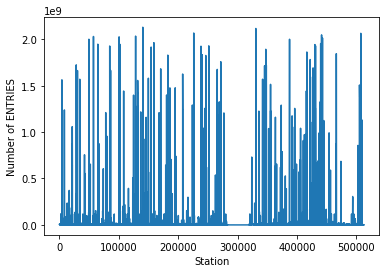

In [294]:
plt.plot(turnstiles_daily["ENTRIES"])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [252]:
#use IQR
sorted(turnstiles_daily["ENTRIES"])
turnstile_daily_median=turnstiles_daily["ENTRIES"].median()
print('the mean is',turnstiles_daily["ENTRIES"].median())
q1, q3= np.percentile(turnstiles_daily["ENTRIES"],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
print('the lower bound is',lower_bound)
upper_bound = q3 +(1.5 * iqr)
print('the lower upper is',upper_bound)
print('the max value is',turnstiles_daily["ENTRIES"].max())
print('the min value is',turnstiles_daily["ENTRIES"].min())



the mean is 2057900.0
the lower bound is -9265695.0
the lower upper is 16164337.0
the max value is 2129249925
the min value is 0


In [253]:
#27-to solve this problem
def get_daily_counts(row,max_counter):
    counter=row["ENTRIES"]-row['PREV_ENTRIES']
    if counter<0:
        counter=-counter
    if counter>max_counter:
        print(row['ENTRIES'],row['PREV_ENTRIES'])
        counter=min(row['ENTRIES'],row['PREV_ENTRIES'])
    if counter>max_counter:
        return 0
    return counter
turnstiles_daily['DAILY_ENTRIES']=turnstiles_daily.apply(get_daily_counts, axis=1,max_counter=upper_bound)

459073 68448066.0
2000091722 6897017.0
11 2029641496.0
875479593 775219651.0
592426 57022793.0
422 17135909.0
22 2129136933.0
21 2129136817.0
458752 117849318.0
1962917508 9137626.0
393224 117441229.0
721441481 2880437.0
352361657 1409610.0
758 621485465.0
1325342695 11664583.0
102459236 210849.0
37 1514083866.0
25 1229078732.0
2473 22554699.0
2162762 33622258.0
592416496 389431.0
18806 654821321.0
569320958 779190.0
163997279 972453993.0
437 36992180.0
78260066 1442544807.0
1862330382 7277226.0
33754095 50516744.0
50474287 33772995.0
1594421086 140471461.0
930 1108422349.0
181 18340503.0
33601461 187873.0
881624264 1942743949.0
88839937 1258666104.0
704681890 2758420.0
109924748 1928952716.0
98096722 670717696.0
2046764758 8810196.0
5 2013355776.0
1124011327 12446364.0
1865 991539888.0
868286381 101740116.0
459154 868286381.0


In [254]:
turnstiles_daily['DAILY_ENTRIES']=turnstiles_daily.apply(get_daily_counts, axis=1,max_counter=upper_bound)

459073 68448066.0
2000091722 6897017.0
11 2029641496.0
875479593 775219651.0
592426 57022793.0
422 17135909.0
22 2129136933.0
21 2129136817.0
458752 117849318.0
1962917508 9137626.0
393224 117441229.0
721441481 2880437.0
352361657 1409610.0
758 621485465.0
1325342695 11664583.0
102459236 210849.0
37 1514083866.0
25 1229078732.0
2473 22554699.0
2162762 33622258.0
592416496 389431.0
18806 654821321.0
569320958 779190.0
163997279 972453993.0
437 36992180.0
78260066 1442544807.0
1862330382 7277226.0
33754095 50516744.0
50474287 33772995.0
1594421086 140471461.0
930 1108422349.0
181 18340503.0
33601461 187873.0
881624264 1942743949.0
88839937 1258666104.0
704681890 2758420.0
109924748 1928952716.0
98096722 670717696.0
2046764758 8810196.0
5 2013355776.0
1124011327 12446364.0
1865 991539888.0
868286381 101740116.0
459154 868286381.0


In [255]:
#to know how many entries in each station
station_daily=turnstiles_daily.groupby(['STATION','DATE'])[['DAILY_ENTRIES']].sum().reset_index()


In [256]:
#the total of number of pepole in each station
station_totals=station_daily.groupby('STATION').sum()\
.sort_values('DAILY_ENTRIES',ascending=False)\
.reset_index()

top_ten_stations=station_totals.head(10)
top_ten_stations

,STATION,DAILY_ENTRIES
0,14 ST,54383538.0
1,GRD CNTRL-42 ST,41745898.0
2,BOROUGH HALL,30520282.0
3,72 ST,27656980.0
4,34 ST-PENN STA,25974180.0
5,125 ST,23750952.0
6,CANAL ST,23296711.0
7,FULTON ST,17275360.0
8,DEKALB AV,16832854.0
9,34 ST-HERALD SQ,16435857.0


In [257]:
#the total of number of pepole in each station
station_average=round(station_daily.groupby('STATION').mean())\
.sort_values('DAILY_ENTRIES',ascending=False)\
.reset_index()

top_five_stations_avr=station_average.head()
top_five_stations_avr

,STATION,DAILY_ENTRIES
0,14 ST,522919.0
1,GRD CNTRL-42 ST,401403.0
2,BOROUGH HALL,293464.0
3,72 ST,265932.0
4,34 ST-PENN STA,249752.0


''

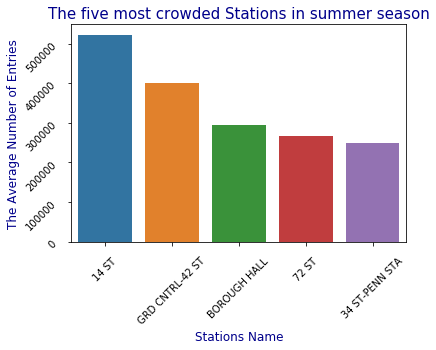

In [258]:
bar1_plot=sns.barplot(top_five_stations_avr['STATION'],top_five_stations_avr['DAILY_ENTRIES'])
bar1_plot.tick_params(pad=10,labelsize=10,rotation=45)
bar1_plot.set_xlabel('Stations Name',size=12,c='darkblue')
bar1_plot.set_ylabel('The Average Number of Entries',size=12,c='darkblue')
bar1_plot.set_title('The five most crowded Stations in summer season',size=15,c='darkblue')
;

### To make sure these stations are really the busiest stations

In [53]:
#14 ST station
mask = (station_daily["STATION"] == '14 ST')

mask_14_ST=station_daily[mask]
(mask_14_ST
 .sort_values("DAILY_ENTRIES", ascending=False)).head(5)
#use IQR To get rid of outlier 
sorted(mask_14_ST["DAILY_ENTRIES"])
q1, q3= np.percentile(mask_14_ST["DAILY_ENTRIES"],[25,75])
iqr = q3 - q1
lower_bound_1 = q1 -(1.5 * iqr) 
print('the lower bound is',lower_bound_1)
upper_bound_1 = q3 +(1.5 * iqr)
print('the lower upper is',upper_bound_1)
print('the max value is',mask_14_ST["DAILY_ENTRIES"].max())
print('the min value is',mask_14_ST["DAILY_ENTRIES"].min())



the lower bound is 1837.875
the lower upper is 101038.875
the max value is 21480243.0
the min value is 16926.0


In [266]:
mask_14_ST.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER
1352,14 ST,06/16/2019,39223.0,39223.0
1353,14 ST,06/17/2019,28500.0,28500.0
1354,14 ST,06/18/2019,61130.0,61130.0
1355,14 ST,06/19/2019,6165755.0,0.0
1356,14 ST,06/20/2019,67911.0,67911.0


Text(0.5, 0, 'Station')

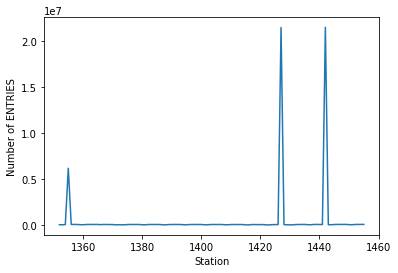

In [293]:
#check for outliers
plt.plot(mask_14_ST["DAILY_ENTRIES"])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [55]:
def update(row,max_value,min_value):
    counter=row["DAILY_ENTRIES"]
    if counter<min_value:
        counter=0
    if counter>max_value:
        counter=0
    return counter



In [56]:
mask_14_ST["DAILY_ENTRIES_AFTER"]=mask_14_ST.apply(update, axis=1,max_value=upper_bound_1,min_value=lower_bound_1)
(mask_14_ST
 .sort_values("DAILY_ENTRIES_AFTER", ascending=False)).head(5)

C:\Users\Nisreen Abdullah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER
1455,14 ST,09/27/2019,71893.0,71893.0
1448,14 ST,09/20/2019,70579.0,70579.0
1454,14 ST,09/26/2019,70259.0,70259.0
1367,14 ST,07/01/2019,70222.0,70222.0
1447,14 ST,09/19/2019,69614.0,69614.0


Text(0.5, 0, 'Station')

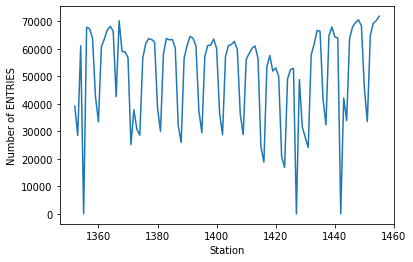

In [295]:
plt.plot(mask_14_ST['DAILY_ENTRIES_AFTER'])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [58]:
The_Result1=[]
The_Result1.append(mask_14_ST)



In [59]:
# GRD CNTRL-42 ST
mask1 = (station_daily["STATION"] == 'GRD CNTRL-42 ST')

GRD_CNTRL_42_ST=station_daily[mask1]
#use IQR To get rid of outlier 
sorted(GRD_CNTRL_42_ST["DAILY_ENTRIES"])
q1, q3= np.percentile(GRD_CNTRL_42_ST["DAILY_ENTRIES"],[25,75])
iqr = q3 - q1
lower_bound_2 = q1 -(1.5 * iqr) 
print('the lower bound is',lower_bound_2)
upper_bound_2 = q3 +(1.5 * iqr)
print('the upper bound is',upper_bound_2)
print('the max value is',GRD_CNTRL_42_ST["DAILY_ENTRIES"].max())
print('the min value is',GRD_CNTRL_42_ST["DAILY_ENTRIES"].min())


the lower bound is -94342.875
the upper bound is 321682.125
the max value is 10362242.0
the min value is 41702.0


In [60]:
GRD_CNTRL_42_ST.sort_values("DAILY_ENTRIES", ascending=False).head(5)

,STATION,DATE,DAILY_ENTRIES
24194,GRD CNTRL-42 ST,08/22/2019,10362242.0
24170,GRD CNTRL-42 ST,07/29/2019,6184246.0
24157,GRD CNTRL-42 ST,07/16/2019,5860697.0
24130,GRD CNTRL-42 ST,06/19/2019,1725826.0
24199,GRD CNTRL-42 ST,08/27/2019,1421728.0


Text(0.5, 0, 'Station')

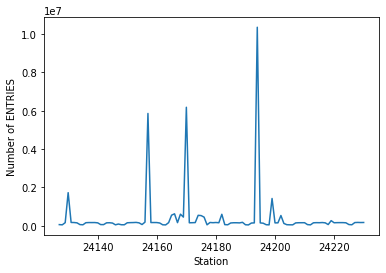

In [296]:
#use plot to see the outlier
plt.plot(GRD_CNTRL_42_ST["DAILY_ENTRIES"])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [62]:
GRD_CNTRL_42_ST["DAILY_ENTRIES_AFTER"]=GRD_CNTRL_42_ST.apply(update, axis=1,max_value=upper_bound_2,min_value=lower_bound_2)
(GRD_CNTRL_42_ST
 .sort_values("DAILY_ENTRIES_AFTER", ascending=False)).head(5)

C:\Users\Nisreen Abdullah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER
24219,GRD CNTRL-42 ST,09/16/2019,264737.0,264737.0
24156,GRD CNTRL-42 ST,07/15/2019,186116.0,186116.0
24189,GRD CNTRL-42 ST,08/17/2019,177078.0,177078.0
24153,GRD CNTRL-42 ST,07/12/2019,172558.0,172558.0
24228,GRD CNTRL-42 ST,09/25/2019,171624.0,171624.0


Text(0.5, 0, 'Station')

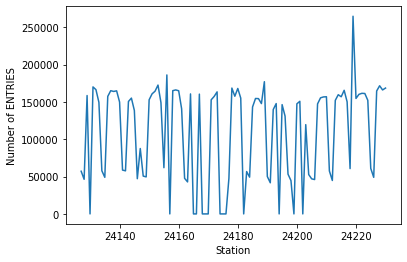

In [297]:
plt.plot(GRD_CNTRL_42_ST['DAILY_ENTRIES_AFTER'])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [64]:
The_Result1.append(GRD_CNTRL_42_ST)
The_Result2=pd.concat(The_Result1)

In [65]:
#BOROUGH HALL station
mask2 = (station_daily["STATION"] == 'BOROUGH HALL')

BOROUGH_HALL=station_daily[mask2]
BOROUGH_HALL.head()
#use IQR To get rid of outlier 
sorted(BOROUGH_HALL["DAILY_ENTRIES"])
q1, q3= np.percentile(BOROUGH_HALL["DAILY_ENTRIES"],[25,75])
iqr = q3 - q1
lower_bound_3 = q1 -(1.5 * iqr) 
print('the lower bound is',lower_bound_3)
upper_bound_3 = q3 +(1.5 * iqr)
print('the upper bound is',upper_bound_3)
print('the max value is',BOROUGH_HALL["DAILY_ENTRIES"].max())
print('the min value is',BOROUGH_HALL["DAILY_ENTRIES"].min())

the lower bound is -19536.25
the upper bound is 68139.75
the max value is 26114514.0
the min value is 8103.0


In [66]:
BOROUGH_HALL.sort_values("DAILY_ENTRIES", ascending=False).head(5)

,STATION,DATE,DAILY_ENTRIES
16196,BOROUGH HALL,09/01/2019,26114514.0
16198,BOROUGH HALL,09/03/2019,1605876.0
16205,BOROUGH HALL,09/10/2019,46423.0
16214,BOROUGH HALL,09/19/2019,40821.0
16220,BOROUGH HALL,09/25/2019,40759.0


Text(0.5, 0, 'Station')

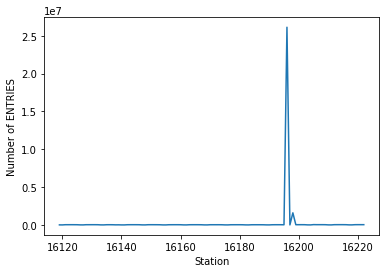

In [298]:
plt.plot(BOROUGH_HALL['DAILY_ENTRIES'])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [68]:
BOROUGH_HALL["DAILY_ENTRIES_AFTER"]=BOROUGH_HALL.apply(update, axis=1,max_value=upper_bound_3,min_value=lower_bound_3)
(BOROUGH_HALL
 .sort_values("DAILY_ENTRIES_AFTER", ascending=False)).head(5)

C:\Users\Nisreen Abdullah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER
16205,BOROUGH HALL,09/10/2019,46423.0,46423.0
16214,BOROUGH HALL,09/19/2019,40821.0,40821.0
16220,BOROUGH HALL,09/25/2019,40759.0,40759.0
16221,BOROUGH HALL,09/26/2019,40396.0,40396.0
16222,BOROUGH HALL,09/27/2019,40282.0,40282.0


Text(0.5, 0, 'Station')

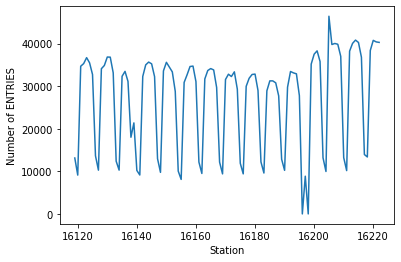

In [299]:
plt.plot(BOROUGH_HALL['DAILY_ENTRIES_AFTER'])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [70]:
The_Result1.append(BOROUGH_HALL)

In [71]:
#72 ST station
mask3 = (station_daily["STATION"] == '72 ST')

ST_72=station_daily[mask3]
ST_72.head()
#use IQR To get rid of outlier 
sorted(ST_72["DAILY_ENTRIES"])
q1, q3= np.percentile(ST_72["DAILY_ENTRIES"],[25,75])
iqr = q3 - q1
lower_bound_4 = q1 -(1.5 * iqr) 
print('the lower bound is',lower_bound_4)
upper_bound_4= q3 +(1.5 * iqr)
print('the upper bound is',upper_bound_4)
print('the max value is',ST_72["DAILY_ENTRIES"].max())
print('the min value is',ST_72["DAILY_ENTRIES"].min())

the lower bound is 9248.5
the upper bound is 69604.5
the max value is 12167503.0
the min value is 14308.0


In [72]:
ST_72.sort_values("DAILY_ENTRIES", ascending=False).head(5)

,STATION,DATE,DAILY_ENTRIES
10140,72 ST,08/07/2019,12167503.0
10160,72 ST,08/27/2019,11173760.0
10157,72 ST,08/24/2019,243313.0
10116,72 ST,07/14/2019,93283.0
10176,72 ST,09/12/2019,60656.0


Text(0.5, 0, 'Station')

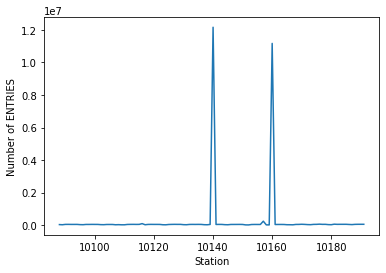

In [300]:
plt.plot(ST_72['DAILY_ENTRIES'])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [74]:
ST_72["DAILY_ENTRIES_AFTER"]=ST_72.apply(update, axis=1,max_value=upper_bound_4,min_value=lower_bound_4)
(ST_72
 .sort_values("DAILY_ENTRIES_AFTER", ascending=False)).head(5)

C:\Users\Nisreen Abdullah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER
10176,72 ST,09/12/2019,60656.0,60656.0
10181,72 ST,09/17/2019,59417.0,59417.0
10170,72 ST,09/06/2019,54022.0,54022.0
10191,72 ST,09/27/2019,52718.0,52718.0
10190,72 ST,09/26/2019,52536.0,52536.0


Text(0.5, 0, 'Station')

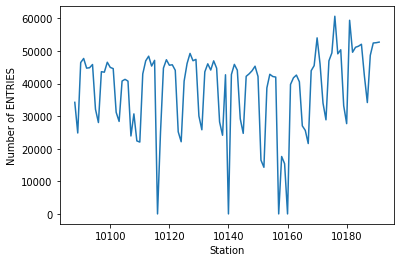

In [301]:
plt.plot(ST_72['DAILY_ENTRIES_AFTER'])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [76]:
The_Result1.append(ST_72)

In [77]:
#34 ST-PENN STA
mask4 = (station_daily["STATION"] == '34 ST-PENN STA')

ST_PENN_STA_34=station_daily[mask4]
ST_PENN_STA_34.head()
#use IQR To get rid of outlier 
sorted(ST_PENN_STA_34["DAILY_ENTRIES"])
q1, q3= np.percentile(ST_PENN_STA_34["DAILY_ENTRIES"],[25,75])
iqr = q3 - q1
lower_bound_5= q1 -(1.5 * iqr) 
print('the lower bound is',lower_bound_5)
upper_bound_5= q3 +(1.5 * iqr)
print('the upper bound is',upper_bound_5)
print('the max value is',ST_PENN_STA_34["DAILY_ENTRIES"].max())
print('the min value is',ST_PENN_STA_34["DAILY_ENTRIES"].min())

the lower bound is -46514.75
the upper bound is 307827.25
the max value is 7632888.0
the min value is 59237.0


Text(0.5, 0, 'Station')

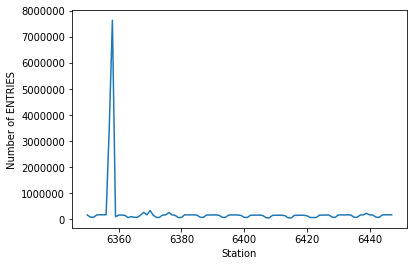

In [302]:
plt.plot(ST_PENN_STA_34['DAILY_ENTRIES'])
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

In [78]:
ST_PENN_STA_34.sort_values("DAILY_ENTRIES", ascending=False).head(5)

,STATION,DATE,DAILY_ENTRIES
6358,34 ST-PENN STA,06/30/2019,7632888.0
6357,34 ST-PENN STA,06/29/2019,3522158.0
6370,34 ST-PENN STA,07/12/2019,345639.0
6368,34 ST-PENN STA,07/10/2019,272849.0
6376,34 ST-PENN STA,07/18/2019,265362.0


In [79]:
ST_PENN_STA_34["DAILY_ENTRIES_AFTER"]=ST_PENN_STA_34.apply(update, axis=1,max_value=upper_bound_5,min_value=lower_bound_5)
(ST_PENN_STA_34
 .sort_values("DAILY_ENTRIES_AFTER", ascending=False)).head(5)

C:\Users\Nisreen Abdullah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER
6368,34 ST-PENN STA,07/10/2019,272849.0,272849.0
6376,34 ST-PENN STA,07/18/2019,265362.0,265362.0
6439,34 ST-PENN STA,09/19/2019,233635.0,233635.0
6347,34 ST-PENN STA,06/19/2019,185990.0,185990.0
6349,34 ST-PENN STA,06/21/2019,181991.0,181991.0


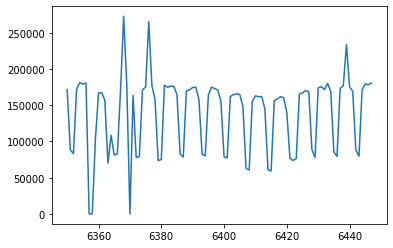

In [288]:
plt.plot(ST_PENN_STA_34['DAILY_ENTRIES_AFTER'])

In [81]:
The_Result1.append(ST_PENN_STA_34)

In [82]:
The_Result2=pd.concat(The_Result1)
The_Result2.count()

STATION                520
DATE                   520
DAILY_ENTRIES          520
DAILY_ENTRIES_AFTER    520
dtype: int64

In [83]:
The_Result2=The_Result2.groupby(["STATION","DATE"]).head()  

In [84]:
The_Result2=The_Result2.sort_values("DAILY_ENTRIES_AFTER", ascending=False)

In [85]:
The_Result2.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER
6368,34 ST-PENN STA,07/10/2019,272849.0,272849.0
6376,34 ST-PENN STA,07/18/2019,265362.0,265362.0
24219,GRD CNTRL-42 ST,09/16/2019,264737.0,264737.0
6439,34 ST-PENN STA,09/19/2019,233635.0,233635.0
24156,GRD CNTRL-42 ST,07/15/2019,186116.0,186116.0


In [86]:
station_average2=round(The_Result2.groupby('STATION').mean())\
.sort_values('DAILY_ENTRIES_AFTER',ascending=False)\
.reset_index()
station_average2.head()

,STATION,DAILY_ENTRIES,DAILY_ENTRIES_AFTER
0,34 ST-PENN STA,249752.0,139168.0
1,GRD CNTRL-42 ST,401403.0,108833.0
2,14 ST,522919.0,50793.0
3,72 ST,265932.0,38261.0
4,BOROUGH HALL,293464.0,26922.0


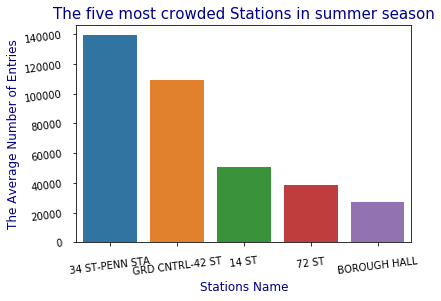

In [215]:
# the bar chart after cleaning the data
bar2_plot=sns.barplot(station_average2['STATION'],station_average2['DAILY_ENTRIES_AFTER'])
bar2_plot.tick_params(pad=10,labelsize=10,rotation=7)
bar2_plot.set_xlabel('Stations Name',size=12,c='darkblue')
bar2_plot.set_ylabel('The Average Number of Entries',size=12,c='darkblue')
bar2_plot.set_title('The five most crowded Stations in summer season',size=15,c='darkblue')
plt.savefig('barstation.png')

In [190]:
plt.savefig('Stationsbar.png')

<Figure size 432x288 with 0 Axes>

In [88]:
#to know the busiest month
ST_PENN_STA_34['Month'] = pd.DatetimeIndex(ST_PENN_STA_34['DATE']).month

C:\Users\Nisreen Abdullah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
ST_PENN_STA_34.head(10)

,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER,Month
6344,34 ST-PENN STA,06/16/2019,86744.0,86744.0,6
6345,34 ST-PENN STA,06/17/2019,79304.0,79304.0,6
6346,34 ST-PENN STA,06/18/2019,173415.0,173415.0,6
6347,34 ST-PENN STA,06/19/2019,185990.0,185990.0,6
6348,34 ST-PENN STA,06/20/2019,178884.0,178884.0,6
6349,34 ST-PENN STA,06/21/2019,181991.0,181991.0,6
6350,34 ST-PENN STA,06/22/2019,171508.0,171508.0,6
6351,34 ST-PENN STA,06/23/2019,88589.0,88589.0,6
6352,34 ST-PENN STA,06/24/2019,83062.0,83062.0,6
6353,34 ST-PENN STA,06/25/2019,171984.0,171984.0,6


In [90]:
#since the first befor 22-june is not in the summer season they will be drouped
for i in range(6344,6350):
    ST_PENN_STA_34=ST_PENN_STA_34.drop(i)
ST_PENN_STA_34.head(10)

,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER,Month
6350,34 ST-PENN STA,06/22/2019,171508.0,171508.0,6
6351,34 ST-PENN STA,06/23/2019,88589.0,88589.0,6
6352,34 ST-PENN STA,06/24/2019,83062.0,83062.0,6
6353,34 ST-PENN STA,06/25/2019,171984.0,171984.0,6
6354,34 ST-PENN STA,06/26/2019,181303.0,181303.0,6
6355,34 ST-PENN STA,06/27/2019,179157.0,179157.0,6
6356,34 ST-PENN STA,06/28/2019,180663.0,180663.0,6
6357,34 ST-PENN STA,06/29/2019,3522158.0,0.0,6
6358,34 ST-PENN STA,06/30/2019,7632888.0,0.0,6
6359,34 ST-PENN STA,07/01/2019,103397.0,103397.0,7


In [91]:
top_Month=ST_PENN_STA_34.groupby(['STATION','Month'])[['DAILY_ENTRIES_AFTER']].sum().reset_index()
top_Month=top_Month.sort_values("DAILY_ENTRIES_AFTER", ascending=False)
top_Month.head()

,STATION,Month,DAILY_ENTRIES_AFTER
1,34 ST-PENN STA,7,4346102.0
2,34 ST-PENN STA,8,4278264.0
3,34 ST-PENN STA,9,3906535.0
0,34 ST-PENN STA,6,1056266.0


In [92]:
mask6 = (ST_PENN_STA_34["Month"] == 6)

In [93]:
mask7 = (ST_PENN_STA_34["Month"] == 7)
ST_PENN_STA_34[mask7].sort_values("DAILY_ENTRIES_AFTER", ascending=False).head(10)

,STATION,DATE,DAILY_ENTRIES,DAILY_ENTRIES_AFTER,Month
6368,34 ST-PENN STA,07/10/2019,272849.0,272849.0,7
6376,34 ST-PENN STA,07/18/2019,265362.0,265362.0,7
6369,34 ST-PENN STA,07/11/2019,178075.0,178075.0,7
6381,34 ST-PENN STA,07/23/2019,177806.0,177806.0,7
6377,34 ST-PENN STA,07/19/2019,177218.0,177218.0,7
6383,34 ST-PENN STA,07/25/2019,176519.0,176519.0,7
6384,34 ST-PENN STA,07/26/2019,176146.0,176146.0,7
6375,34 ST-PENN STA,07/17/2019,175286.0,175286.0,7
6382,34 ST-PENN STA,07/24/2019,174734.0,174734.0,7
6389,34 ST-PENN STA,07/31/2019,171211.0,171211.0,7


In [94]:
mask8 = (ST_PENN_STA_34["Month"] == 8)

In [95]:
mask9 = (ST_PENN_STA_34["Month"] == 9)

Text(0.5, 15.0, 'Station')

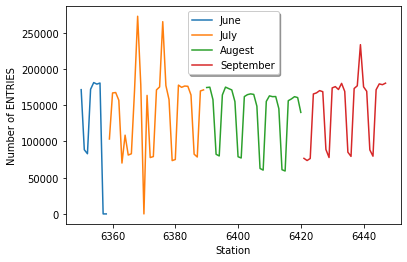

In [303]:
plt.plot(ST_PENN_STA_34[mask6]['DAILY_ENTRIES_AFTER'])
plt.plot(ST_PENN_STA_34[mask7]['DAILY_ENTRIES_AFTER'])
plt.plot(ST_PENN_STA_34[mask8]['DAILY_ENTRIES_AFTER'])
plt.plot(ST_PENN_STA_34[mask9]['DAILY_ENTRIES_AFTER'])
plt.legend(['June','July','Augest','September'],shadow = True, loc = 0);
plt.savefig('monthplot.png')
plt.ylabel('Number of ENTRIES')
plt.xlabel('Station')

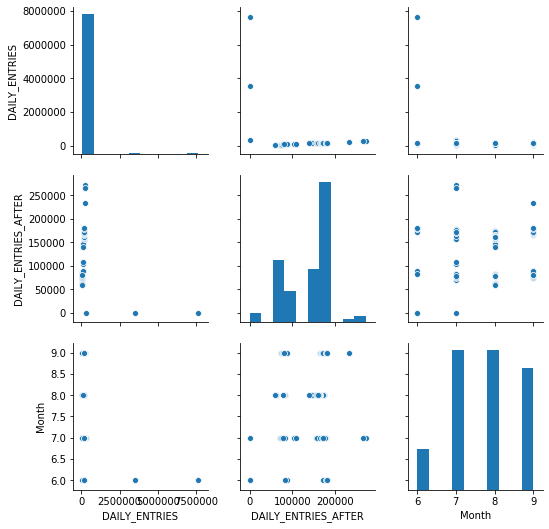

In [188]:
# the graph showes how the data after cleaning effect on chosen th most crowded month
sns.pairplot(ST_PENN_STA_34); 

In [192]:
#to know the best date to establishing the market 
best_10_Date=ST_PENN_STA_34[mask7].sort_values("DAILY_ENTRIES_AFTER", ascending=False).head(10)
best_Date=ST_PENN_STA_34[mask7].sort_values("DAILY_ENTRIES_AFTER", ascending=False).head(1)
best_Date=best_Date['DATE']
best_Date

6368    07/10/2019
Name: DATE, dtype: object

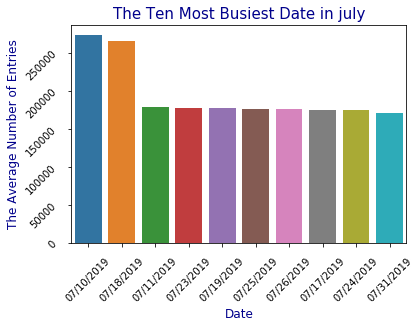

In [205]:
bar2_plot=sns.barplot(best_10_Date['DATE'],best_10_Date['DAILY_ENTRIES_AFTER'])
bar2_plot.tick_params(pad=10,labelsize=10,rotation=45)
bar2_plot.set_xlabel('Date',size=12,c='darkblue')
bar2_plot.set_ylabel('The Average Number of Entries',size=12,c='darkblue')
bar2_plot.set_title('The Ten Most Busiest Date in july',size=15,c='darkblue')
bar2_plot=bar2_plot.get_figure()
bar2_plot.savefig('TopDate.png',dpi=100)

## Conclusion:
the 34 ST-PENN STA that located at the intersection of 34th Street and Seventh Avenue,in 10th of july will be the best time to establishing the market .

## Summary 
Al-Sayegh Charitable foundation want establish a charity market near one of the most crowded station in summer season .
The goal of this project to find the most crowded stations in summer season, by analyzing the data of a pervious summer season before Covid-19 .So in this project we will chose the to data from 22-june-2019 to 28-september-2019 so can Al-Sayegh Charitable foundation can establish their charity market.
To start exploring this goal, I start cleaning the data to know what is the most crowded station in summer season.
the result 34 ST-PENN STA that located at the intersection of 34th Street and Seventh Avenue,in 10th of july will be the best time to establishing the market .